In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


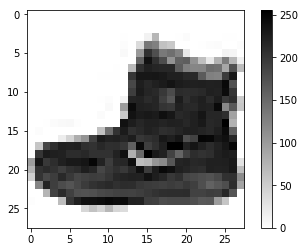

In [5]:
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

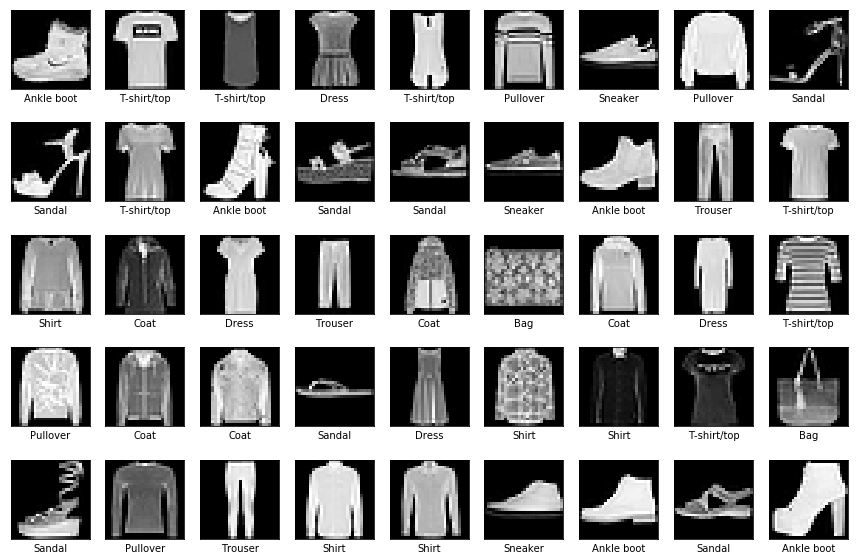

In [10]:
plt.figure(figsize=(15,10))
for i in range(45):
    plt.subplot(5,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary_r)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [39]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(64,activation=tf.nn.relu),
                         keras.layers.Dropout(0.4),
                         keras.layers.Dense(32,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax)
                         ])

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [41]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.6287 - acc: 0.7787
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4327 - acc: 0.8449
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3851 - acc: 0.8629
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3611 - acc: 0.8702
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3438 - acc: 0.8779
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3279 - acc: 0.8808
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3168 - acc: 0.8860
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3057 - acc: 0.8893
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3009 - acc: 0.8892
Epoch 10/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.2893 - acc: 0.8944

In [42]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


In [43]:
print('Test loss:', test_loss)

Test loss: 0.3538920522212982


In [44]:
print('Test accuracy:', test_accuracy)


Test accuracy: 0.8741


In [45]:
predictions = model.predict(test_images)

In [46]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


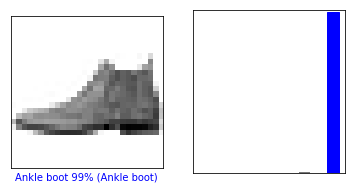

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


In [58]:
len(np.argmax(predictions,axis=1))

10000

In [53]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [67]:
fp, update_op = tf.metrics.false_positives(test_labels,np.argmax(predictions,axis=1))

In [72]:
len(np.where(np.argmax(predictions,axis=1)-test_labels != 0)[0])

1259

In [73]:
fp = np.where(np.argmax(predictions,axis=1)-test_labels != 0)[0]

In [81]:
fp[0:100]

array([ 12,  17,  21,  23,  25,  40,  42,  49,  51,  57,  66,  68,  89,
        98, 103, 107, 127, 141, 147, 150, 151, 153, 172, 192, 205, 222,
       227, 239, 244, 247, 255, 299, 316, 324, 325, 332, 341, 359, 361,
       368, 374, 378, 381, 382, 396, 406, 409, 410, 413, 441, 444, 452,
       454, 457, 460, 474, 480, 491, 526, 529, 531, 548, 562, 563, 565,
       569, 572, 577, 586, 587, 595, 622, 623, 628, 635, 639, 663, 669,
       670, 681, 688, 689, 697, 701, 702, 711, 722, 732, 753, 760, 761,
       779, 787, 798, 800, 801, 830, 851, 860, 877])

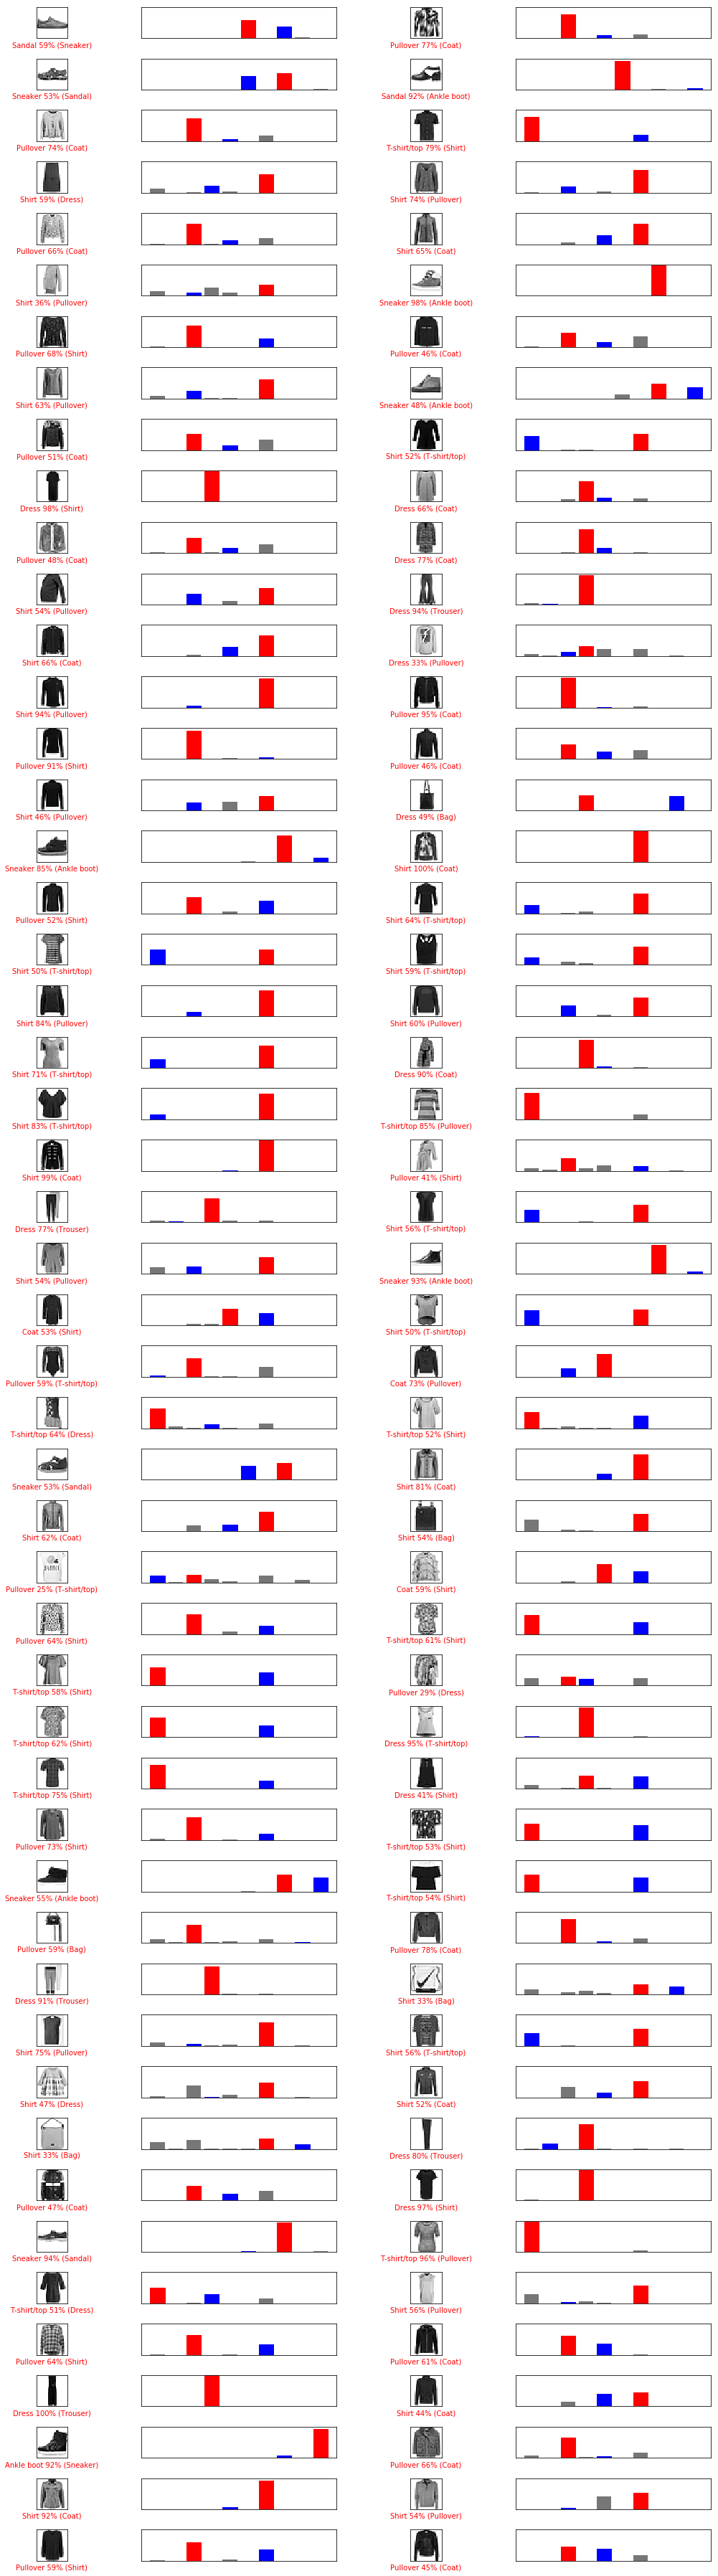

In [89]:
plt.figure(figsize=(15,50))
counter = 0

for i in fp[0:100]:
    
    plt.subplot(50,4,counter+1)
    plot_image(i, predictions, test_labels, test_images)
    #print(counter)
    plt.subplot(50,4,counter+2)
    plot_value_array(i, predictions,  test_labels)
    counter = counter+2
    
plt.tight_layout()   
plt.show()

In [90]:
matrix = tf.confusion_matrix(np.argmax(predictions,axis=1), test_labels)

In [91]:
matrix.

<tf.Tensor 'confusion_matrix/SparseTensorDenseAdd:0' shape=(10, 10) dtype=int32>

In [92]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, np.argmax(predictions,axis=1))

In [95]:
import itertools

Confusion matrix, without normalization
[[800   2  15  39   3   0 138   0   3   0]
 [  1 966   0  27   2   0   3   0   1   0]
 [ 11   0 817  13  53   0 106   0   0   0]
 [ 17   3   9 924  23   0  23   0   1   0]
 [  0   0 127  37 684   0 152   0   0   0]
 [  0   0   1   0   0 924   0  35   0  40]
 [103   2  81  37  33   0 735   0   9   0]
 [  0   0   0   0   0   5   0 963   0  32]
 [  1   0   2   5   4   5  12   3 968   0]
 [  0   0   0   0   0   4   1  35   0 960]]


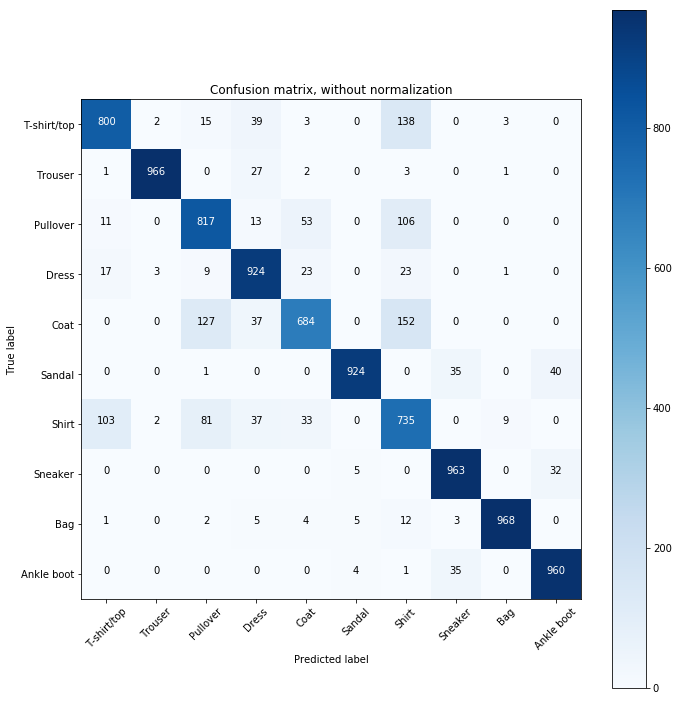

In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, np.argmax(predictions,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()